<a href="https://colab.research.google.com/github/francji1/01PR/blob/main/R/Greg_Hamel_Intro_To_R/intro_to_r_part_21_descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to R Part 21: Descriptive Statistics

source:  https://www.kaggle.com/code/hamelg/intro-to-r-index/notebook

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis. We've already seen several examples of deceptive statistics in earlier lessons, such as means and medians. In this lesson, we'll review some of these functions and explore several new ones.

# Measures of Center

Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.

The mean is simply an average: the sum of the values divided by the total number of records. As we've seen before, there are several ways to get means in R.

In [1]:
cars <- mtcars      # Use the mtcars data set

mean(cars$mpg)      # mean() gets the mean for 1 variable

[1] 20.09062

In [2]:
# colMeans() gets the means for all columns in a data frame
colMeans(cars)

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

In [ ]:
# rowMeans() gets the means for all rows in a data frame
head(rowMeans(cars))    

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
         29.90727          29.98136          23.59818          38.73955 
Hornet Sportabout           Valiant 
         53.66455          35.04909

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it. As we've seen previously, you can get the median using the median() function.

In [ ]:
median(cars$mpg)

[1] 19.2

To get the median of every column, we can use the apply() function which takes a data object, a function to execute, and a specified margin (rows or columns).

In [ ]:
colMedians <- apply(cars,            
                    MARGIN=2,        # Operate on columns
                    FUN = median)    # Use function median

colMedians

mpg     cyl    disp      hp    drat      wt    qsec      vs      am    gear 
 19.200   6.000 196.300 123.000   3.695   3.325  17.710   0.000   0.000   4.000 
   carb 
  2.000

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot.

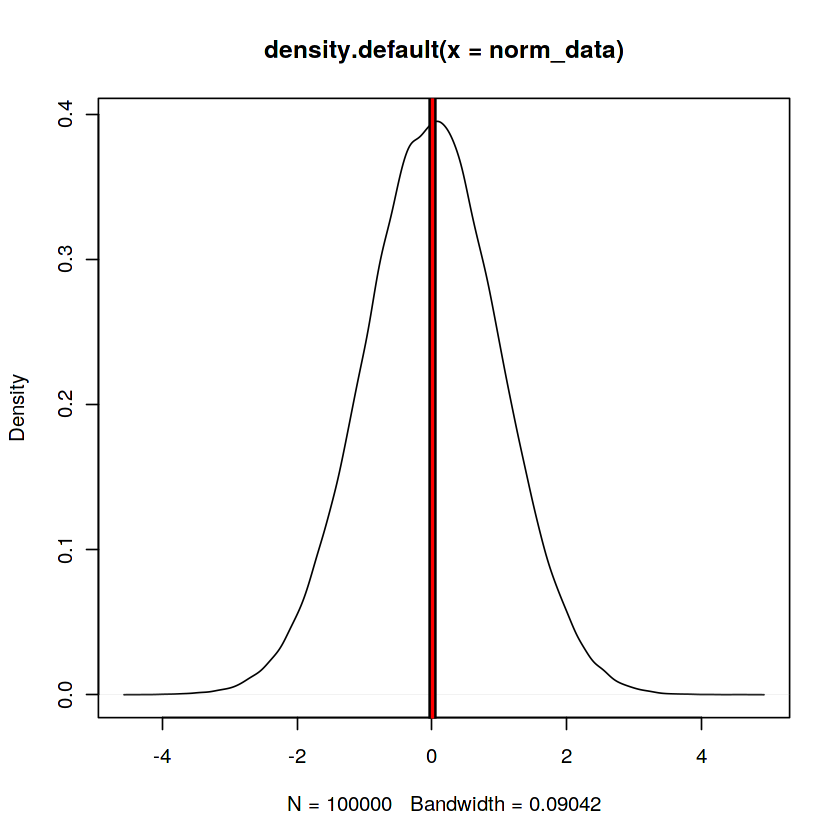

In [ ]:
norm_data <- rnorm(100000)          # Generate normally distributed data

plot(density(norm_data))            # Create a density plot

abline(v=mean(norm_data), lwd=5)    # Plot a thick black line at the mean

abline(v=median(norm_data), col="red", lwd=2 )   # Plot a red line at the median

In the plot above the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean.

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew.

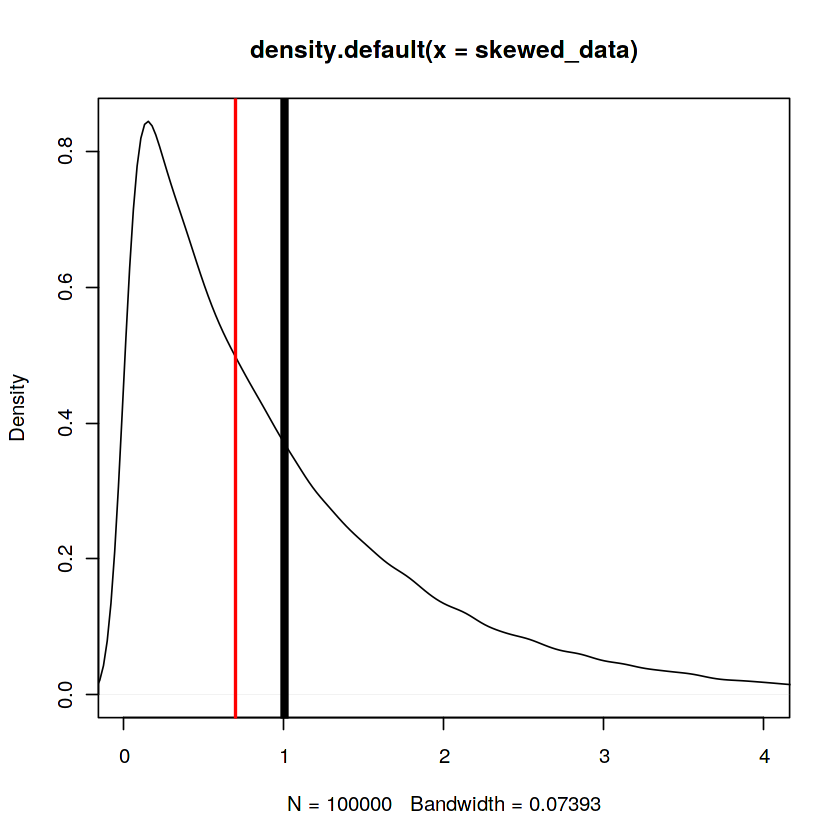

In [ ]:
skewed_data <- rexp(100000,1)           # Generate skewed data

plot(density(skewed_data), xlim=c(0,4))    

# Black line at the mean
abline(v=mean(skewed_data), lwd=5)  

# Red line at the median
abline(v=median(skewed_data), col="red", lwd=2 )  

The mean is also influenced heavily by outliers while the median resists the influence of outliers.

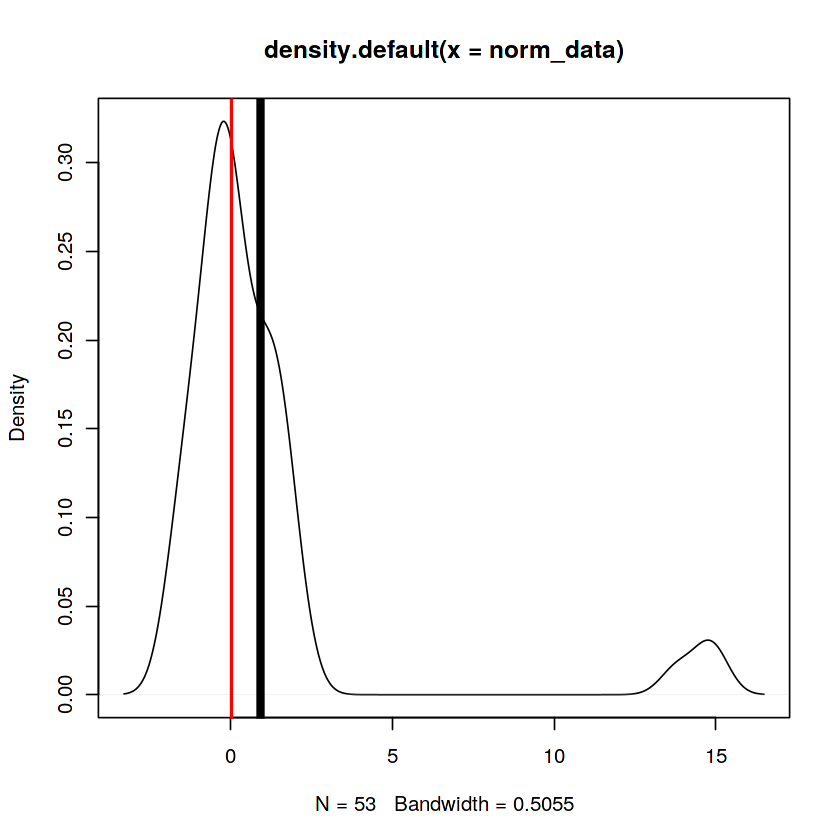

In [ ]:
norm_data <- rnorm(50)             # Generate 50 normally distributed points

outliers <- rnorm(3, mean=15)      # Generate 3 outliers

norm_data <- c(norm_data,outliers)      # Add outliers

plot(density(norm_data))                

# Black line at the mean
abline(v=mean(norm_data), lwd=5)        

# Red line at the median
abline(v=median(norm_data), col="red", lwd=2 )   

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.
The mode of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. R does not include a function to find the mode, since it is not always a particularly useful statistic: oftentimes all the values in variable are unique so the mode is essentially meaningless. You can find the mode of a variable by creating a data table for the variable to get the counts of each value and then getting the variable with the largest count.

In [ ]:
# Dummy data
data <- c("cat","hat","cat","hat","hat","sat")   

# Create table of counts
data_table <- table(data)                   

data_table

# Get the index of the variable with the max count
max_index <- which.max(data_table)   

# Use the index to get the mode from the table's names
names(data_table)[max_index]     

data
cat hat sat 
  2   3   1 

[1] "hat"

If you need to repeatedly find the mode, you could wrap these steps into a user-defined function:

In [ ]:
mode_function <- function(data){                         # Define new function
    data_table <- table(data)                            # Create data table
    max_index <- which.max(data_table)                   # Find max index
    if (is.numeric(data)){                               # If input is numeric data
        return(as.numeric(names(data_table)[max_index])) # Return output as numeric
    }
    names(data_table)[max_index]            # Otherwise return output as character
}

mode_function(data)

[1] "hat"

*Note: Base R contains a function called mode() but it does not find the mode of a data set: it checks the type or storage mode of an object.*

Let's use our new mode function to find the modes of each column of the mtcars data set by passing it in to the apply function:

In [ ]:
colModes <- apply(cars,            
                 MARGIN=2,               # operate on columns
                 FUN = mode_function)    # use function mode_function

print(colModes)

   mpg    cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
 10.40   8.00 275.80 110.00   3.07   3.44  17.02   0.00   0.00   3.00   2.00 


# Measures of Spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations.

In [ ]:
# Subtract min from max to get the range
max(cars$mpg) - min(cars$mpg)     

[1] 23.5

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function.

In [ ]:
quantile(cars$mpg)

0%    25%    50%    75%   100% 
10.400 15.425 19.200 22.800 33.900

Since these values are so commonly used to describe data, they are known as the "five number summary" and R has a couple other ways to find them.

In [ ]:
# Get five number summary
fivenum(cars$mpg)   

# Summary() shows the five number summary plus the mean
summary(cars$mpg)   

[1] 10.40 15.35 19.20 22.80 33.90

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

The quantile() function also lets you check percentiles other than common ones that make up the five number summary. To find percentiles, pass a vector of percentiles to the probs argument.

In [ ]:
quantile(cars$mpg,
        probs = c(0.1,0.9))  # get the 10th and 90th percentiles

10%   90% 
14.34 30.09

Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile, which encompasses half the data. R has a built in IRQ() fuction.

In [ ]:
IQR(cars$mpg)

[1] 7.375

The boxplots we learned to create in the lessons on plotting are just visual representations of the five number summary and IQR.

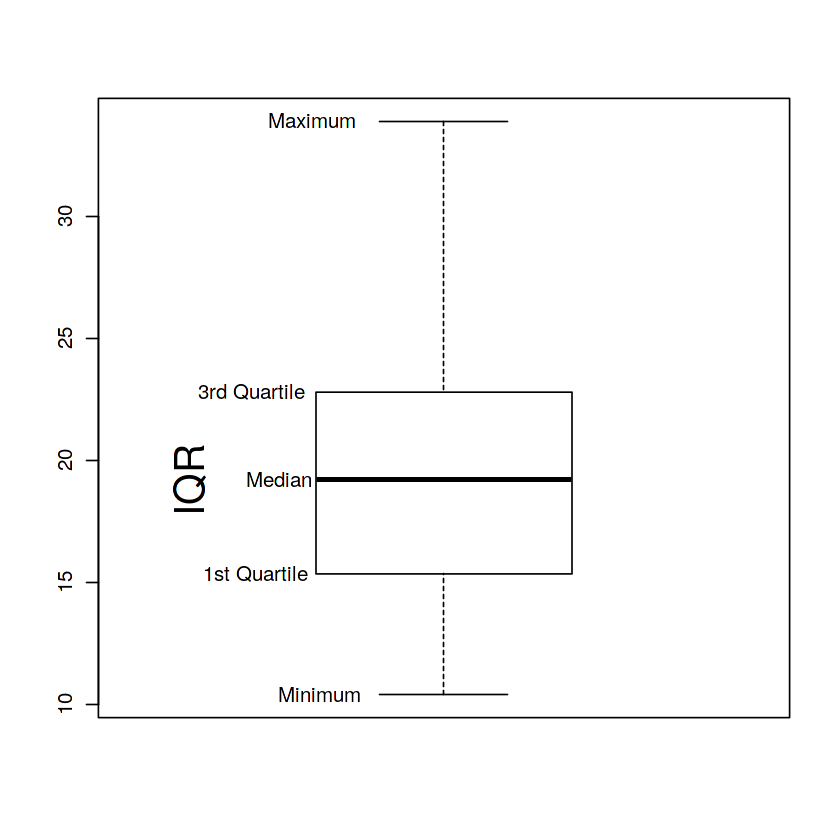

In [ ]:
five_num <- fivenum(cars$mpg)

boxplot(cars$mpg)

text(x=five_num[1], adj=2, labels ="Minimum")
text(x=five_num[2], adj=2.3, labels ="1st Quartile")
text(x=five_num[3], adj=3, labels ="Median")
text(x=five_num[4], adj=2.3, labels ="3rd Quartile")
text(x=five_num[5], adj=2, labels ="Maximum")
text(x=five_num[3], adj=c(0.5,-8), labels ="IQR", srt=90, cex=2)

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use the built-in function var() to check variance.

In [ ]:
var(cars$mpg)   # get variance

[1] 36.3241

The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use sd() to check the standard deviation.

In [ ]:
sd(cars$mpg)    # get standard deviation

[1] 6.026948

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. Use the built in mad() function to find median absolute deviation.

In [ ]:
mad(cars$mpg)    # get median absolute deviation

[1] 5.41149

# Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures how much data is in the tails of a distribution v.s. the center. We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

To check skewness and kurtosis, we'll need the "e1071" package. First let's create some some dummy data and inspect it with a series of plots.

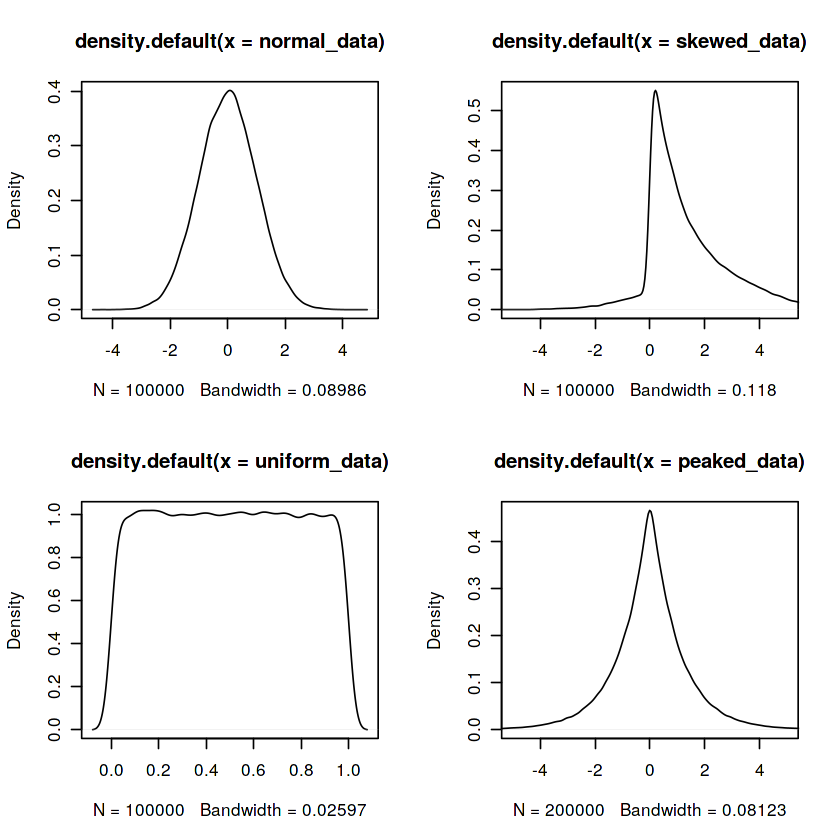

In [ ]:
library(e1071)

normal_data <- rnorm(100000)                       # Generate normally distributed data
skewed_data <- c(rnorm(35000,sd=2)+2,rexp(65000))  # Generate skewed data
uniform_data <- runif(100000,0,1)                  # Generate uniformly distributed data
peaked_data <- c(rexp(100000),                     # Generate data with a sharp peak
                (rexp(100000)*-1))


par(mfrow=c(2,2))                          # Make density plots of the distributions*
plot(density(normal_data))
plot(density(skewed_data),xlim=c(-5,5))
plot(density(uniform_data))
plot(density(peaked_data),xlim=c(-5,5))

*Note: par() lets you set various graphical parameters. In this case, mfrow=c(2,2) lets us combine 4 plots into a single plot with 2 rows and 2 columns.*

Now let's check the skewness of each of the distributions. Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except for the second one, because all the others are roughly symmetric:

In [ ]:
skewness(normal_data)
skewness(skewed_data)
skewness(uniform_data)
skewness(peaked_data)

[1] 0.009266176

[1] 0.9886329

[1] 0.00318924

[1] -0.007258666

The 3 roughly symmetric distributions have almost zero skewness, while the positively skewed distribution has positive skewness.
Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [ ]:
kurtosis(normal_data)
kurtosis(skewed_data)
kurtosis(uniform_data)
kurtosis(peaked_data)

[1] -0.01794001

[1] 1.836919

[1] -1.199489

[1] 3.099425

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis and the two distributions with more data in the tails v.s. the center have higher kurtosis.

# Wrap Up

Descriptive statistics help you explore features of your data, like center, spread and shape by summarizing them with numerical measurements. Descriptive statistics help inform the direction of an analysis and let you communicate your insights to others quickly and succinctly. In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.

In this lesson we generated a lot of random data to illustrate concepts, but we haven't actually learned much about the functions we've been using to generate random data. In the next lesson, we'll learn about probability distributions, including how to draw random data from them.

# Next Lesson: [Intro to R Part 22: Probability Distributions](https://www.kaggle.com/hamelg/intro-to-r-part-22-probability-distributions)
[back to index](https://www.kaggle.com/hamelg/intro-to-r-index)

# Exercises

To do the exercises, fork this notebook and then fill in and run the code boxes according to the exercise instructions.

### Exercise #1
Load the Titanic training data set and then calculate the difference between the mean and median of the Fare column.

In [ ]:
titanic_train <- read.csv("../input/train.csv")

"Your Code Here!"

[1] "Your Code Here!"

### Exercise #2
Calculate the standard deviation of the Fare column.

In [ ]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #3
Find the mode of the Fare column.

In [ ]:
fare_table <- table(titanic_train$Fare)

"Your Code Here!"

[1] "Your Code Here!"

## Exercise Solutions

In [ ]:
# 1 

titanic_train <- read.csv("../input/train.csv")

mean(titanic_train$Fare) - median(titanic_train$Fare)


# 2 

fivenum(titanic_train$Fare)

# 3

fare_table <- table(titanic_train$Fare)

fare_table[which.max(fare_table)]



[1] 17.75001

[1]   0.0000   7.9104  14.4542  31.0000 512.3292

8.05 
  43